In [54]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
# Data processing, metrics and modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
# Lgbm
import lightgbm as lgb
import xgboost as xgb

In [2]:
#load data
data = pd.read_csv(r"E:\evaluation\p20\brazilcovid19.csv",encoding='latin1')

In [3]:
#Lets check the top 5 records
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [4]:
#Lets check the rows and columns
data.shape

(5644, 111)

In [6]:
data.info()
#So there are 111 columns and thats why it is not showing up here


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [7]:
data.columns.values
#Lets check the column names

array(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Mycoplasma pneumoniae', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella p

In [11]:
#Lets check for null values and data type 
data.isnull().sum() 

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [12]:
#lets check the statistics
data.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.187396e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.598342e-08 -3.820598e-10           7.373957e-09     8.416943e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  ...  Hb saturation (arterial blood gases)  \
count  6.020000e+02  ...                          2.700000e+01   
mean  -7.863787e-09  ...                         -1.851852e-10   
std    1.000832e+00  ...                          1.019049e+00   
min   -1.865070e+00  ...                         -1.999560e+00   
25%   -7.307069e-01  ...                         -1.122574e+00   
50%   -1.426696e-02  ...                          2.677689e-01   
75%    5.976919e-01  ...                          7.383496e-01   
max    3.764100e+00  ...                          1.337265e+00   

       pCO2 (arterial blood gas analysis)  \
count                        2.700000e+01   
mean                         8.370370e-09   
std                          1.019049e+00   
min                         -1.244817e+00   
25%                         -5.348102e-01   
50%                         -2.120799e-01   
75%                          2.305214e-02   
max                          3.236524e+00   

       Base excess (arterial blood gas analysis)  \
count                               2.700000e+01   
mean                               -1.703704e-09   
std                                 1.019049e+00   
min                                -3.082674e+00   
25%                                -3.308668e-01   
50%     

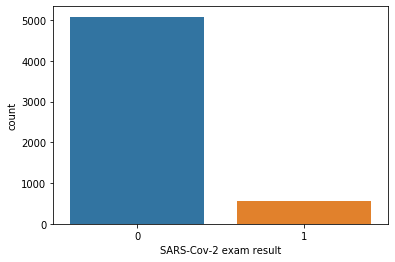

In [14]:
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].replace(['negative','positive'], [0,1])
sns.countplot(data['SARS-Cov-2 exam result'])
#Observation 
#Out of all the Results , Most of the results are negative 

In [25]:
format(100 * data['SARS-Cov-2 exam result'].value_counts()[1]/data.shape[0])
#So we can see that 9.88 % of the Result is positive and rest are negative

'9.886605244507441'

In [15]:
 !pip install quilt

In [18]:
#Lets create a function for missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [21]:
#Missing data 
missing_data(data)

Patient ID Patient age quantile SARS-Cov-2 exam result  \
Total            0                    0                      0   
Percent          0                    0                      0   
Types       object                int64                  int64   

        Patient addmited to regular ward (1=yes, 0=no)  \
Total                                                0   
Percent                                              0   
Types                                            int64   

        Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Total                                                    0      
Percent                                                  0      
Types                                                int64      

        Patient addmited to intensive care unit (1=yes, 0=no) Hematocrit  \
Total                                                    0          5041   
Percent                                                  0       89.3161   
Types                                                int64       float64   

        Hemoglobin Platelets Mean platelet volume   ...  \
Total         5041      5042                  5045  ...   
Percent    89.3161   89.3338                89.387  ...   
Types      float64   float64               float64  ...   

        Hb saturation (arterial blood gases)  \
Total                                   5617   
Percent                              99.5216   
Types                                float64   

        pCO2 (arterial blood gas analysis)  \
Total                                 5617   
Percent                            99.5216   
Types                              float64   

        Base excess (arterial blood gas analysis)  \
Total                                        5617   
Percent                                   99.5216   
Types                                     float64   

        pH (arterial blood gas analysis)  \
Total                               5617   
Percent                          99.5216   
Types                            float64   

        Total CO2 (arterial blood gas analysis)  \
Total                                      5617   
Percent                                 99.5216   
Types                                   float64   

        HCO3 (arterial blood gas analysis) pO2 (arterial blood gas analysis)  \
Total                                 5617                              5617   
Percent                            99.5216                           99.5216   
Types                              float64                           float64   

        Arteiral Fio2 Phosphor ctO2 (arterial blood gas analysis)  
Total            5624     5624                               5617  
Percent       99.6456  99.6456                            99.5216  
Types         float64  float64                            float64  

[3 rows x 111 columns]

In [27]:

!pip install missingno 
# Nullity Matrix : The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion.

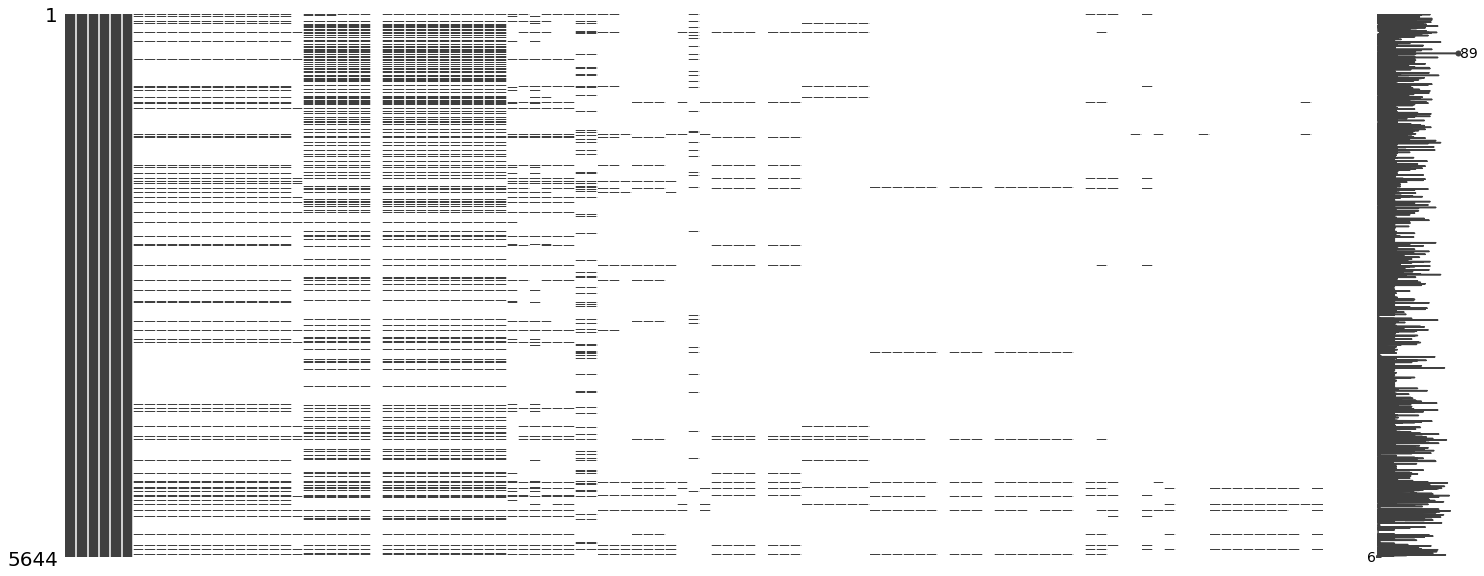

In [29]:
import missingno as msno
msno.matrix(data.head(20000))

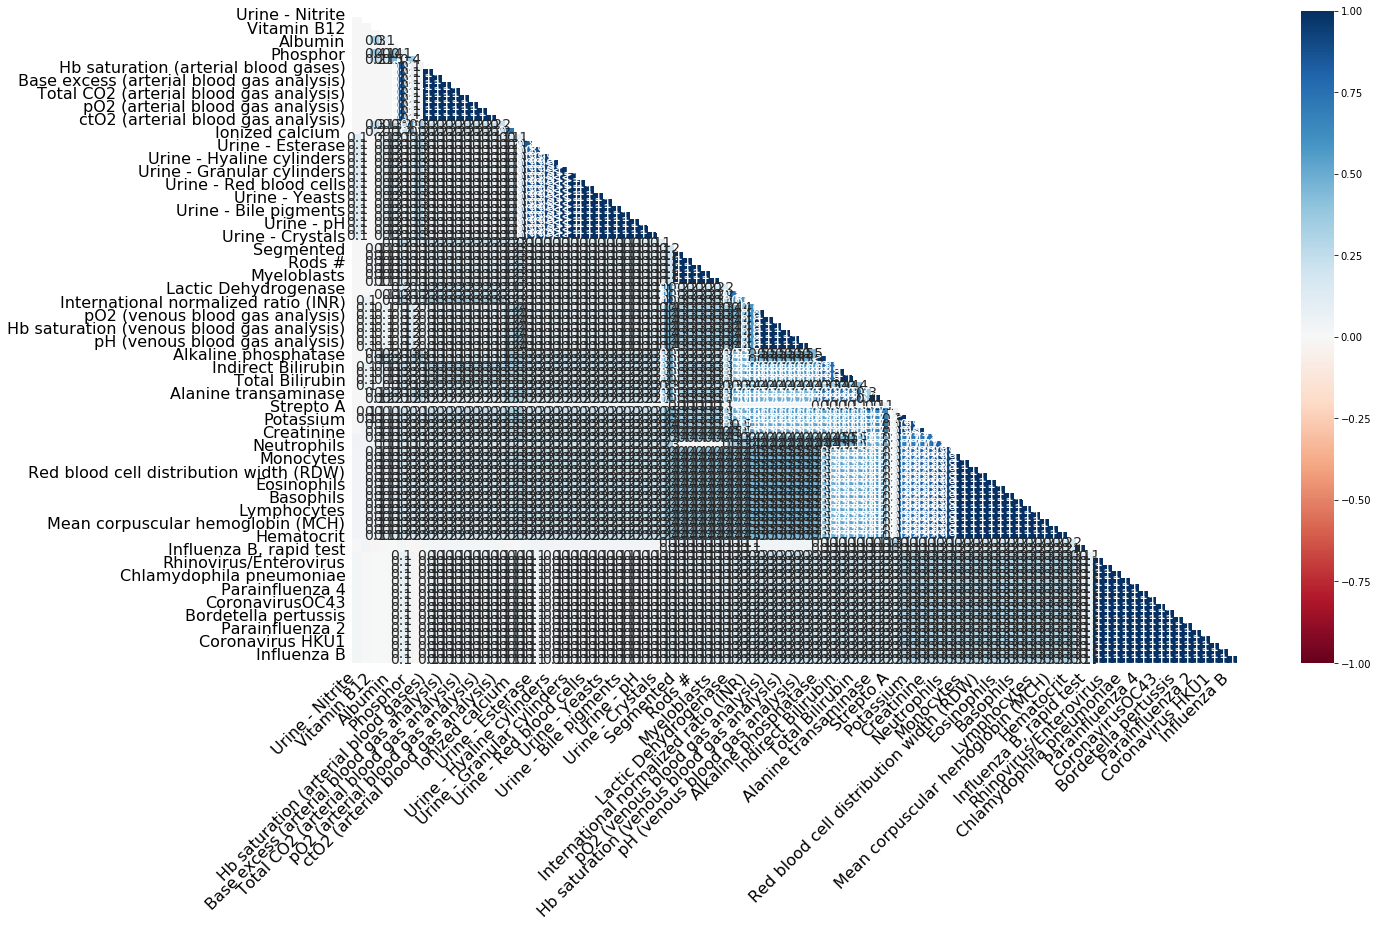

In [31]:
a = msno.heatmap(data, sort='ascending')
a

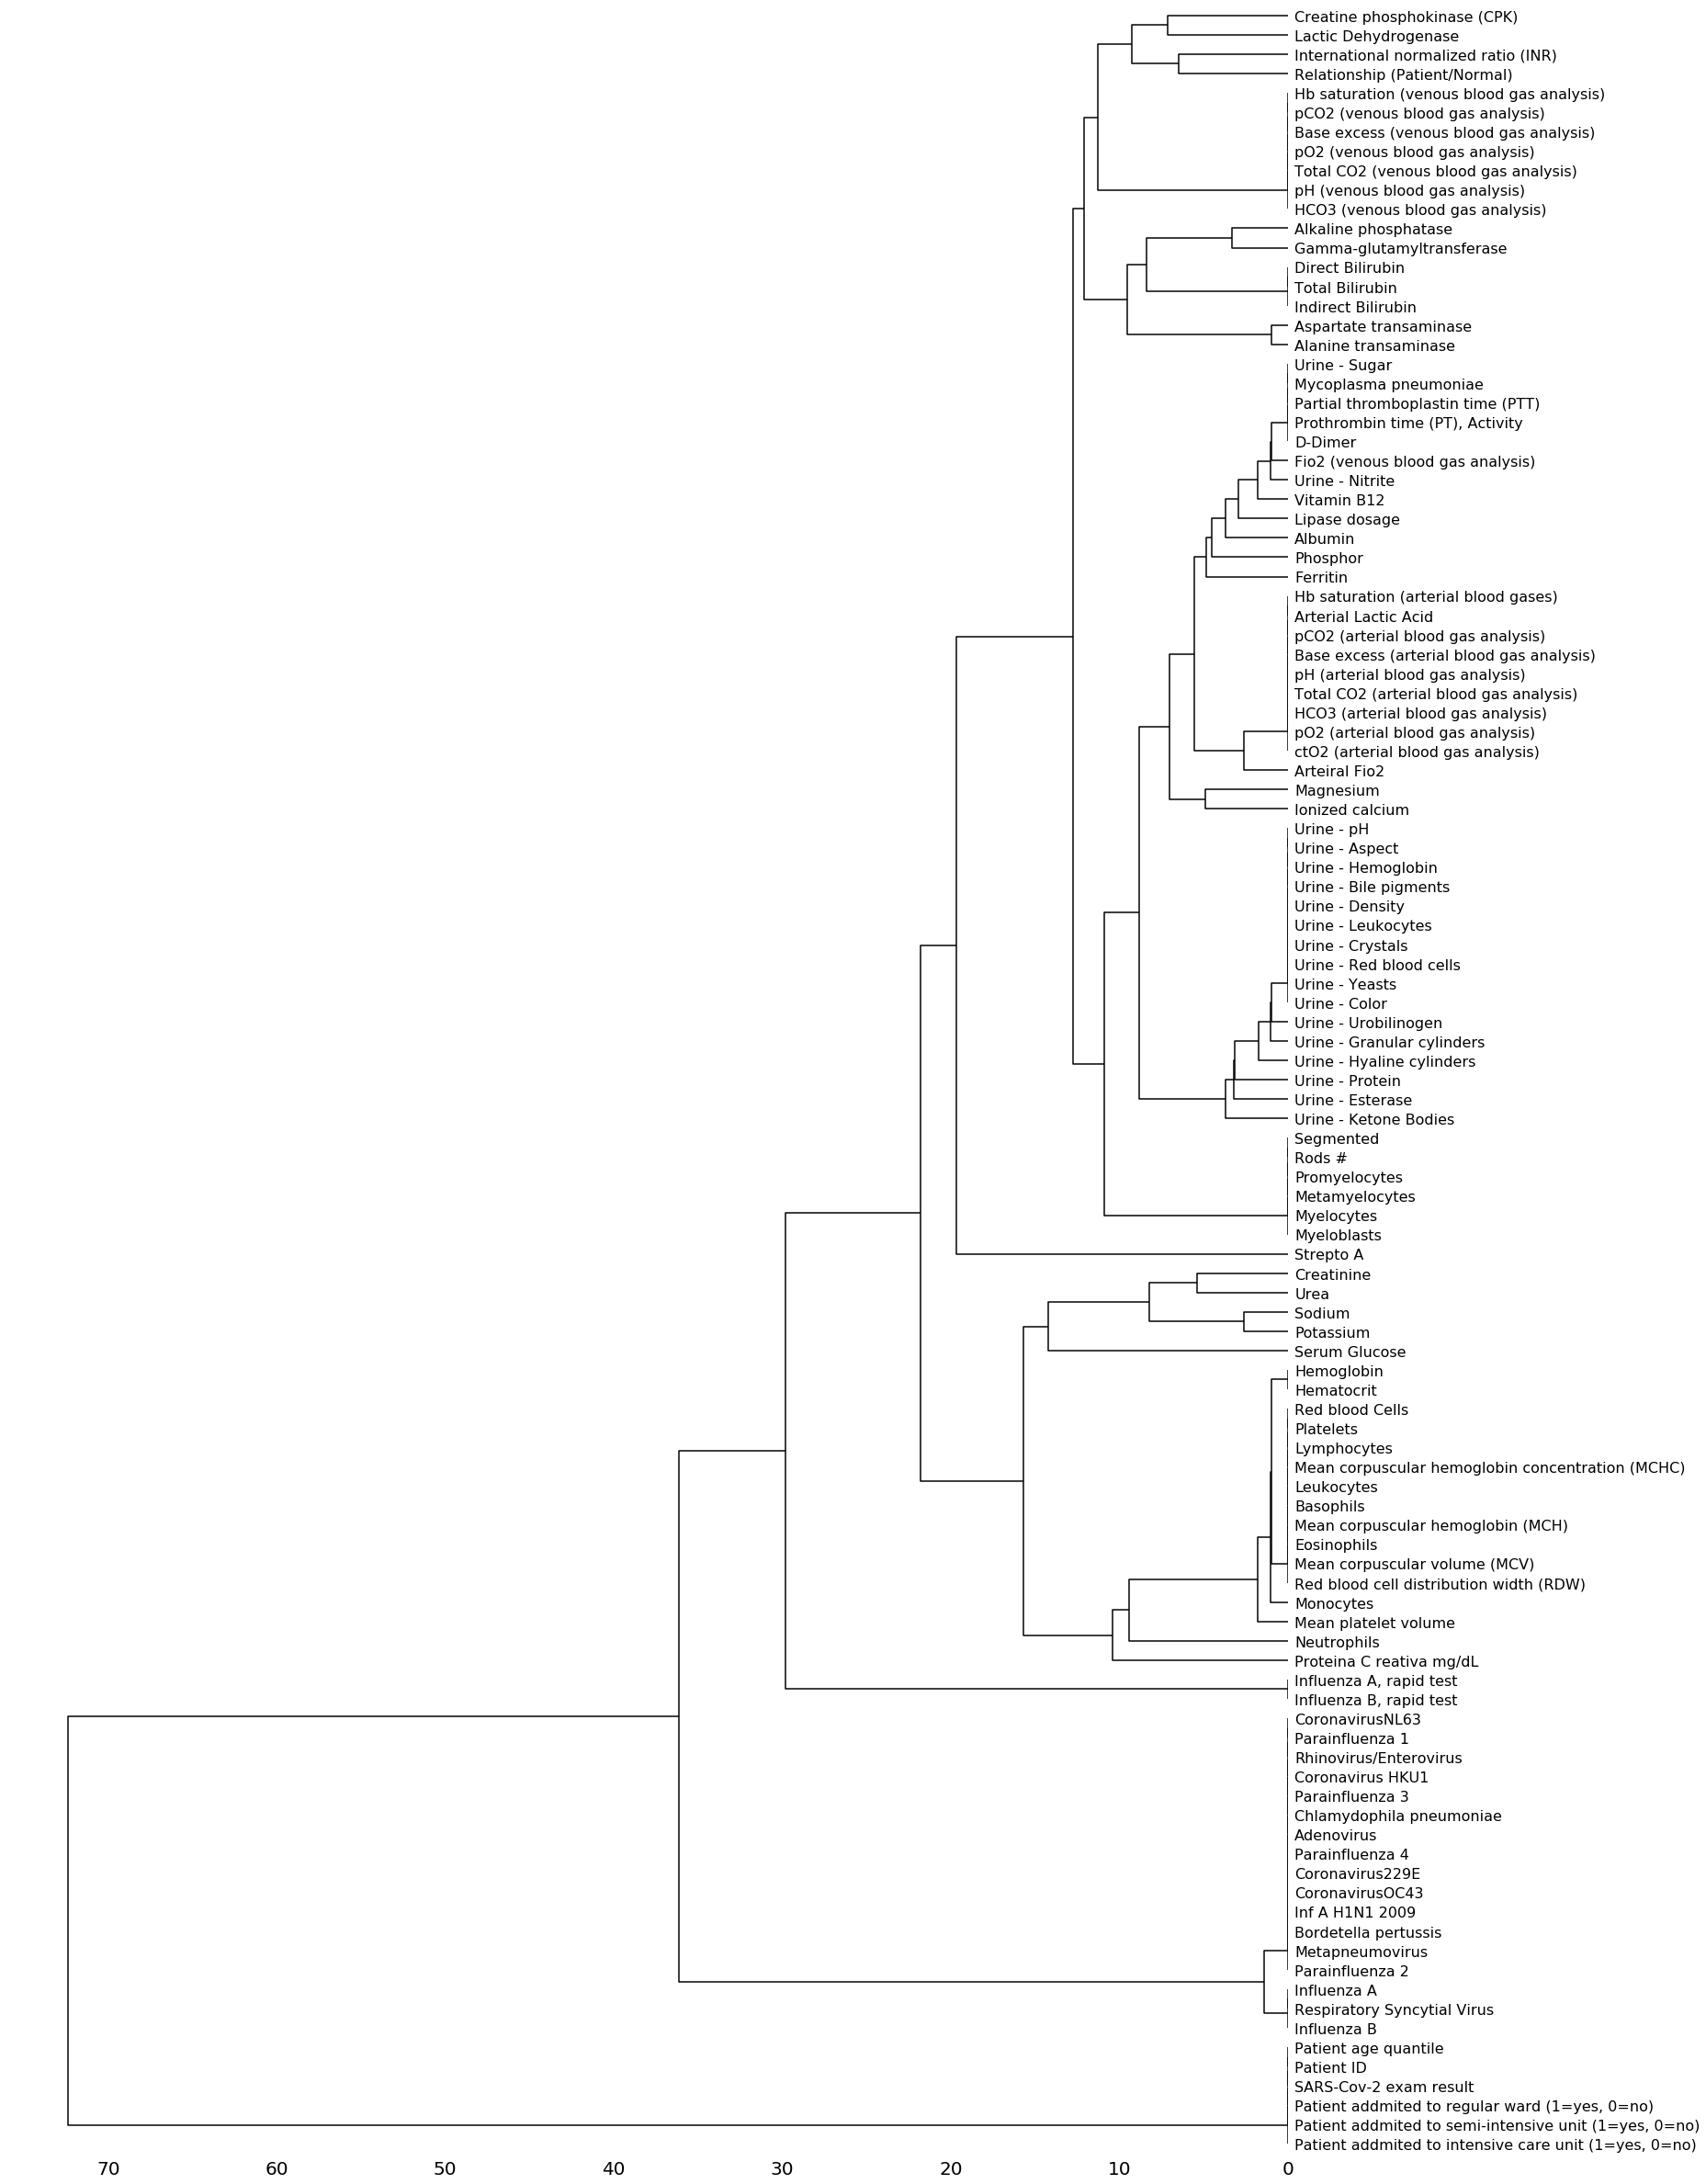

In [32]:
b = msno.dendrogram(data)
b
#Dendro diagram helps us to fully correlate variable completion ; revealing trends deeper than the pairwise ones visible in the correlation heatmap

In [33]:
data.dtypes.value_counts()
#Lets check the count of each datatype

float64    70
object     36
int64       5
dtype: int64

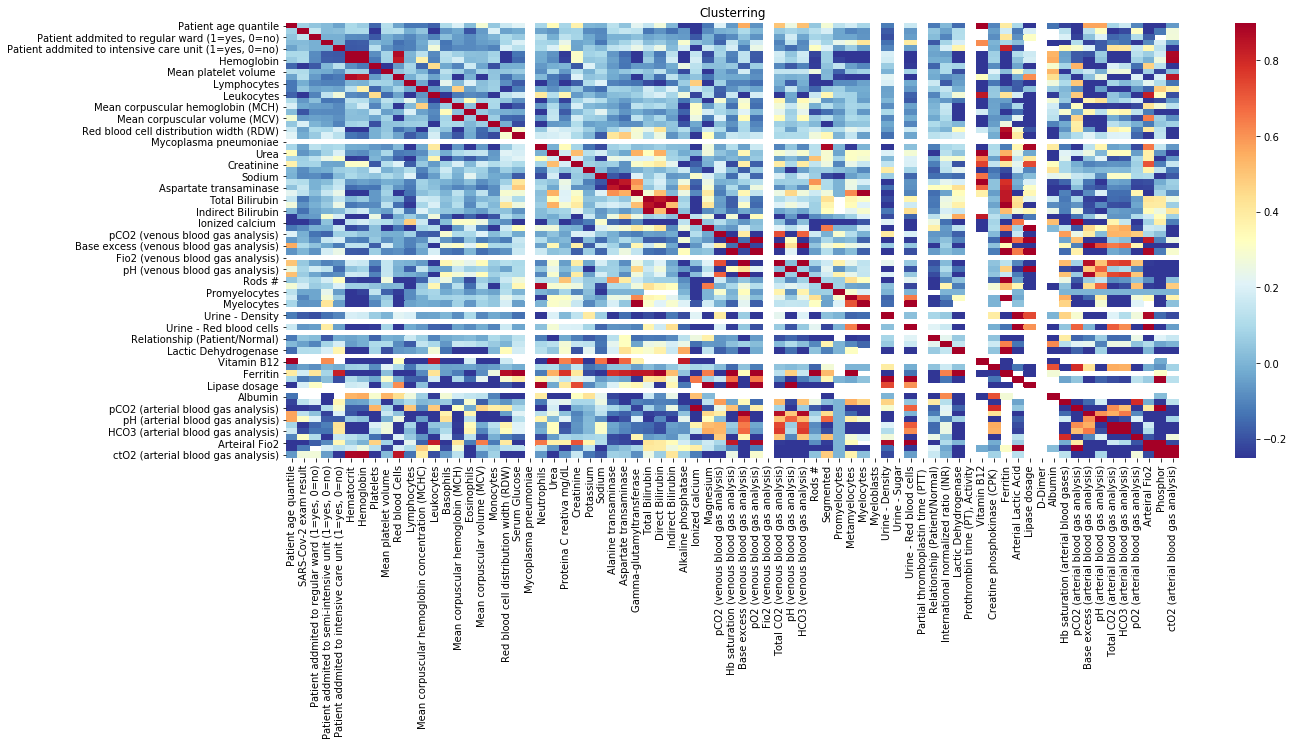

In [35]:
#Lets check the correlation using heatmap
corrs = data.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.9)
plt.title('Clusterring');

In [38]:
#Importing required libraries 
import plotly.graph_objs as go
import plotly.express as px
import plotly.offline as py
fig = px.pie( values=data.groupby(['SARS-Cov-2 exam result']).size().values,names=data.groupby(['SARS-Cov-2 exam result']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#FEE000" ) )   
py.iplot(fig)
#Observation
#90% of population is negative

In [39]:
#Lets do the encoding
for c in data.columns:
    if data[c].dtype=='float16' or  data[c].dtype=='float32' or  data[c].dtype=='float64':
        data[c].fillna(data[c].mean())

#fill in -999 for categoricals
data = data.fillna(-999)
# Label Encoding
for f in data.columns:
    if data[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(data[f].values))
        data[f] = lbl.transform(list(data[f].values))

In [40]:
data.head()

Patient ID  Patient age quantile  SARS-Cov-2 exam result  \
0        1588                    13                       0   
1         451                    17                       0   
2        3669                     8                       0   
3        5457                     5                       0   
4        4843                    15                       0   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0     -999.000000   
1                                                  0        0.236515   
2                                                  0     -999.000000   
3                                                  0     -999.000000   
4                                                  0     -999.000000   

   Hemoglobin   Platelets  Mean platelet volume   ...  \
0  -999.00000 -999.000000            -999.000000  ...   
1    -0.02234   -0.517413               0.010677  ...   
2  -999.00000 -999.000000            -999.000000  ...   
3  -999.00000 -999.000000            -999.000000  ...   
4  -999.00000 -999.000000            -999.000000  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                -999.0                              -999.0   
1                                -999.0                              -999.0   
2                                -999.0                              -999.0   
3                                -999.0                              -999.0   
4                                -999.0                              -999.0   

   Base excess (arterial blood gas analysis)  \
0                                     -999.0   
1                                     -999.0   
2                                     -999.0   
3                                     -999.0   
4                                     -999.0   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                            -999.0                                   -999.0   
1                            -999.0                                   -999.0   
2                            -999.0                                   -999.0   
3                            -999.0                                   -999.0   
4                            -999.0                                   -999.0   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                              -999.0                             -999.0   
1                              -999.0                             -999.0   
2                              -999.0                             -999.0   
3                              -999.0                             -999.0   
4                              -999.0                             -999.0   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0         -999.0    -999.0                              -999.0  
1         -999.0    -999.0                              -999.0  
2         -999.0    -999.0                              -999.0  
3         -999.0    -999.0                              -999.0  
4         -999.0    -999.0                              -999.0  

[5 rows x 111 columns]

In [41]:
#Lets check Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

Patient ID  \
Patient ID                                            1.000000   
Patient age quantile                                  0.014136   
SARS-Cov-2 exam result                                0.018664   
Patient addmited to regular ward (1=yes, 0=no)        0.003748   
Patient addmited to semi-intensive unit (1=yes,...    0.004803   

                                                    Patient age quantile  \
Patient ID                                                      0.014136   
Patient age quantile                                            1.000000   
SARS-Cov-2 exam result                                          0.075244   
Patient addmited to regular ward (1=yes, 0=no)                  0.046166   
Patient addmited to semi-intensive unit (1=yes,...              0.015736   

                                                    SARS-Cov-2 exam result  \
Patient ID                                                        0.018664   
Patient age quantile                                              0.075244   
SARS-Cov-2 exam result                                            1.000000   
Patient addmited to regular ward (1=yes, 0=no)                    0.142437   
Patient addmited to semi-intensive unit (1=yes,...                0.019364   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                                                0.003748   
Patient age quantile                                                                      0.046166   
SARS-Cov-2 exam result                                                                    0.142437   
Patient addmited to regular ward (1=yes, 0=no)                                            1.000000   
Patient addmited to semi-intensive unit (1=yes,...                                        0.011264   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                                                   0.004803       
Patient age quantile                                                                         0.015736       
SARS-Cov-2 exam result                                                                       0.019364       
Patient addmited to regular ward (1=yes, 0=no)                                               0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                           1.000000       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                                                   0.000162       
Patient age quantile                                                                         0.035772       
SARS-Cov-2 exam result                                                                       0.027586       
Patient addmited to regular ward (1=yes, 0=no)                                               0.010192       
Patient addmited to semi-intensive unit (1=yes,...                                           0.008087       

                                                    Hematocrit  Hemoglobin  \
Patient ID                                            0.002173    0.002167   
Patient age quantile                                  0.109140    0.109128   
SARS-Cov-2 exam result                                0.044974    0.044976   
Patient addmited to regular ward (1=yes, 0=no)        0.241889    0.241885   
Patient addmited to semi-intensive unit (1=yes,...    0.224213    0.224218   

                                                    Platelets  \
Patient ID                                           0.001974   
Patient age quantile                                 0.109860   
SARS-Cov-2 exam result                               0.045045   
Patient addmited to regular ward (1=yes, 0=no)       0.242051   
Patient addm

In [42]:
# Threshold for removing correlated variables
threshold = 0.92

In [43]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

Patient ID  \
Patient ID                                                 NaN   
Patient age quantile                                       NaN   
SARS-Cov-2 exam result                                     NaN   
Patient addmited to regular ward (1=yes, 0=no)             NaN   
Patient addmited to semi-intensive unit (1=yes,...         NaN   

                                                    Patient age quantile  \
Patient ID                                                      0.014136   
Patient age quantile                                                 NaN   
SARS-Cov-2 exam result                                               NaN   
Patient addmited to regular ward (1=yes, 0=no)                       NaN   
Patient addmited to semi-intensive unit (1=yes,...                   NaN   

                                                    SARS-Cov-2 exam result  \
Patient ID                                                        0.018664   
Patient age quantile                                              0.075244   
SARS-Cov-2 exam result                                                 NaN   
Patient addmited to regular ward (1=yes, 0=no)                         NaN   
Patient addmited to semi-intensive unit (1=yes,...                     NaN   

                                                    Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                                                0.003748   
Patient age quantile                                                                      0.046166   
SARS-Cov-2 exam result                                                                    0.142437   
Patient addmited to regular ward (1=yes, 0=no)                                                 NaN   
Patient addmited to semi-intensive unit (1=yes,...                                             NaN   

                                                    Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                                                   0.004803       
Patient age quantile                                                                         0.015736       
SARS-Cov-2 exam result                                                                       0.019364       
Patient addmited to regular ward (1=yes, 0=no)                                               0.011264       
Patient addmited to semi-intensive unit (1=yes,...                                                NaN       

                                                    Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                                                   0.000162       
Patient age quantile                                                                         0.035772       
SARS-Cov-2 exam result                                                                       0.027586       
Patient addmited to regular ward (1=yes, 0=no)                                               0.010192       
Patient addmited to semi-intensive unit (1=yes,...                                           0.008087       

                                                    Hematocrit  Hemoglobin  \
Patient ID                                            0.002173    0.002167   
Patient age quantile                                  0.109140    0.109128   
SARS-Cov-2 exam result                                0.044974    0.044976   
Patient addmited to regular ward (1=yes, 0=no)        0.241889    0.241885   
Patient addmited to semi-intensive unit (1=yes,...    0.224213    0.224218   

                                                    Platelets  \
Patient ID                                           0.001974   
Patient age quantile                                 0.109860   
SARS-Cov-2 exam result                               0.045045   
Patient addmited to regular ward (1=yes, 0=no)       0.242051   
Patient addm

In [44]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
data = data.drop(columns = to_drop)
print('Data shape: ', data.shape)
print('Size of the data', data.shape)

There are 64 columns to remove.
Data shape:  (5644, 47)
Size of the data (5644, 47)


In [45]:
to_drop

['Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Creatinine',
 'Sodium',
 'Influenza A, rapid test',
 'Aspartate transaminase',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis

In [46]:
## Dataset missing values (in percent)
dataset_missing = (data.isnull().sum() / len(data)).sort_values(ascending = False)
dataset_missing.head()

Phosphor            0.0
Urea                0.0
Magnesium           0.0
Strepto A           0.0
Ionized calcium     0.0
dtype: float64

In [47]:
# Identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.85]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 85%% missing values' % len(all_missing))
dataset = data.drop(columns = all_missing)
print('Data shape: ', data.shape)

There are 0 columns with more than 85% missing values
Data shape:  (5644, 47)


In [51]:
cat_features = [i for i in data.columns if str(data[i].dtype) in ['object', 'category']]

if len(cat_features) > 0:
    data[cat_features] = data[cat_features].astype('category')


df_lgb = data.copy()
for i in cat_features:
    df_lgb[i] = data[i].cat.codes
    df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]

dataset_labels = df_lgb['SARS-Cov-2 exam result']
df_lgb_ = df_lgb.copy()
df_lgb = df_lgb.drop(['Patient ID', 
                 'SARS-Cov-2 exam result', 
                 'Patient addmited to regular ward (1=yes, 0=no)', 
                 'Patient addmited to semi-intensive unit (1=yes, 0=no)', 
                 'Patient addmited to intensive care unit (1=yes, 0=no)'
                ], axis=1)
x = df_lgb.copy()

In [ ]:
#modelling
train_df = dataset_small
features = list(train_df)
features.remove( 'patient_id')
features.remove( 'sars_cov_2_exam_result')
features.remove( 'patient_addmited_to_intensive_care_unit__1_yes__0_no_')
features.remove( 'patient_addmited_to_regular_ward__1_yes__0_no_')
features.remove( 'patient_addmited_to_semi_intensive_unit__1_yes__0_no_')
target = 'sars_cov_2_exam_result'